# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
import dendrotweaks as dd

/home/roman/Documents/code/DendroTweaks/app/src


In [3]:
# morphology
dd.morphology.Node
dd.morphology.Tree
dd.morphology.SWCNode
dd.morphology.SWCTree
dd.morphology.Section
dd.morphology.SectionTree
dd.morphology.Segment
dd.morphology.SegmentTree

dendrotweaks.morphology.seg_trees.SegmentTree

In [4]:
# membrane
dd.membrane.Mechanism
dd.membrane.SectionGroup
dd.DistributionFunction

dendrotweaks.membrane.distribution_functions.DistributionFunction

In [5]:
# stimuli
dd.stimuli.IClamp
dd.stimuli.Synapse
dd.stimuli.Population

dendrotweaks.stimuli.synapses.Population

In [6]:
dd.Model
dd.NEURONSimulator

dendrotweaks.simulators.NEURONSimulator

# Create a Model

In [7]:
model = dd.Model(name='Park_2019', path_to_data='data/')

## Load morphology from SWC

In [8]:
model.info()

Model: Park_2019
Path to data: data/
Simulator: NEURON
Groups: 0
Mechanisms: 0
Parameters: 0
IClamps: 0
Synapses: 0


In [ ]:
file_name = 'Park_2019.swc'
# file_name = 'ball-and-stick.swc'
model.from_swc(file_name)

In [10]:
model.sec_tree.topology()

parent |   idx
---------------
    -1 |   •0
     0 |   ├─•1
     0 |   ├─•2
     0 |   ├─•3
     0 |   ├─•4
     0 |   ├─•5
     5 |   │ ├─•6
     5 |   │ └─•7
     0 |   ├─•8
     0 |   └─•9
     9 |     ├─•10
    10 |     │ ├─•11
    11 |     │ │ ├─•12
    12 |     │ │ │ ├─•13
    13 |     │ │ │ │ ├─•14
    14 |     │ │ │ │ │ ├─•15
    15 |     │ │ │ │ │ │ ├─•16
    15 |     │ │ │ │ │ │ └─•17
    14 |     │ │ │ │ │ └─•18
    13 |     │ │ │ │ └─•19
    19 |     │ │ │ │   ├─•20
    20 |     │ │ │ │   │ ├─•21
    20 |     │ │ │ │   │ └─•22
    19 |     │ │ │ │   └─•23
    23 |     │ │ │ │     ├─•24
    23 |     │ │ │ │     └─•25
    12 |     │ │ │ └─•26
    11 |     │ │ └─•27
    27 |     │ │   ├─•28
    27 |     │ │   └─•29
    10 |     │ └─•30
    30 |     │   ├─•31
    31 |     │   │ ├─•32
    32 |     │   │ │ ├─•33
    32 |     │   │ │ └─•34
    34 |     │   │ │   ├─•35
    34 |     │   │ │   └─•36
    31 |     │   │ └─•37
    30 |     │   └─•38
    38 |     │     ├─•39
    39 |   

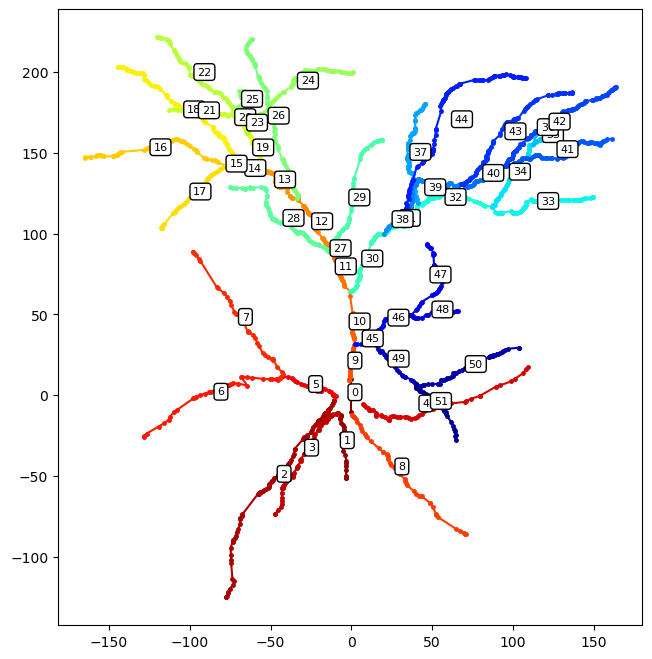

In [11]:
fig, ax = plt.subplots(figsize=(8, 8))
model.sec_tree.plot_sections(ax, 
                             show_points=True,
                             show_lines=True,
                             annotate=True)

## Create and reference sections

In [12]:
model.create_and_reference_sections_in_simulator()

Building sections in NEURON...
52 sections created.


In [13]:
for sec in model.sec_tree:
    print(sec._ref.cm, sec._ref.Ra)
    break

1.0 35.4


## Add Mechanisms

In [14]:
model.modm.list_archives()

{'Base': ['Leak'],
 'Park_2019': ['Na', 'KCa', 'Kv', 'Ka', 'CaHVA', 'Km', 'CaLVA'],
 'Park_test': ['Na', 'Kv']}

The choice here is:
- load all, add where needed (new)
- load one, add everywhere (old)

In [ ]:
model.load_mechanisms(archive='Base', recompile=True)

Replacing SUFFIX Leak with SUFFIX Leak
Saved changes to data/mod/Base/Leak.mod
/home/roman/Documents/code/DendroTweaks/app/src/data/mod/Base
Mod files: "./Leak.mod"

Creating 'x86_64' directory for .o files.

 -> Compiling mod_func.cpp
 -> NMODL ../Leak.mod
 -> Compiling Leak.c
 => LINKING shared library ./libnrnmech.so


/home/roman/anaconda3/envs/dendrotweaks/bin/nrnivmodl:10: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import working_set
Translating Leak.mod into /home/roman/Documents/code/DendroTweaks/app/src/data/mod/Base/x86_64/Leak.c
Thread Safe


 => LINKING executable ./special LDFLAGS are:    -pthread
Successfully created x86_64/special
Compiled mod files from "data/mod/Base"
Loaded mechanisms from "data/mod/Base"
Mechanism Leak added to model.


## Default groups

In [ ]:
# Add a group of all sections
all_sections = model.sec_tree.sections
model.add_group('all', all_sections)

In [ ]:
# Create a distribution for cm and Ra

# segment - parameter - value
# group - parameter - distribution_function

f = DistributionFunction('uniform', value=1)
model.groups['all'].set_distribution(parameter="cm", 
                                     function=f, 
                                     distribute=True)

f = DistributionFunction('uniform', value=100)
model.groups['all'].set_distribution(parameter="Ra",
                                     function=f,
                                     distribute=True)

model.gorups['all'].parameters['cm'].update_distribution_parameters(value=1)


model.groups['all'].add_parameter('cm')
model.groups['all'].parameters['cm'].set_distribution('uniform', value=1)
modeel.groups['all'].distribute('cm')

In [ ]:
# Distribute all parameters in the model
for group in model.groups:
    for param in group.parameters:
        groups.distribute(param)

Group(all) with 52 nodes
Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv'] cm uniform({'value': 1})
Group(all) with 52 nodes
Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv'] Ra uniform({'value': 100})
Group(all) with 52 nodes
Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv'] gbar_Leak uniform({'value': 0.0001})
Group(all) with 52 nodes
Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv'] gbar_Na uniform({'value': 0.03})
Group(all) with 52 nodes
Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv'] gbar_Kv uniform({'value': 0.003})
Group(somatic) with 1 nodes
Parameters: ['gbar_Na', 'gbar_Kv', 'cm'] gbar_Na uniform({'value': 0.05})
Group(somatic) with 1 nodes
Parameters: ['gbar_Na', 'gbar_Kv', 'cm'] gbar_Kv uniform({'value': 0.005})
Group(somatic) with 1 nodes
Parameters: ['gbar_Na', 'gbar_Kv', 'cm'] cm uniform({'value': 2})


## Segmentation

In [20]:
d_lambda = 0.1
model.set_geom_nseg(d_lambda)
model.build_seg_tree()

Building SEG tree...
Connecting tree.


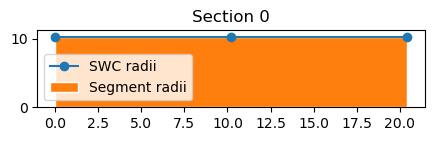

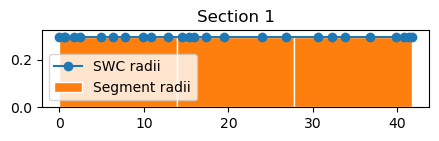

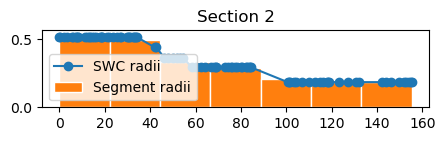

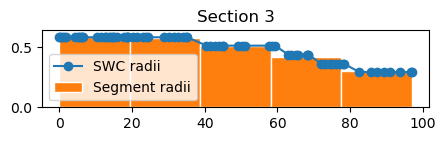

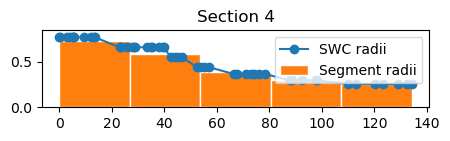

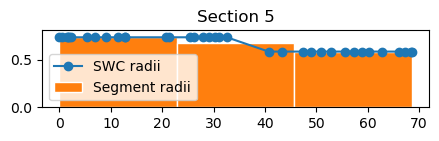

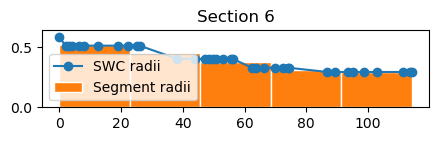

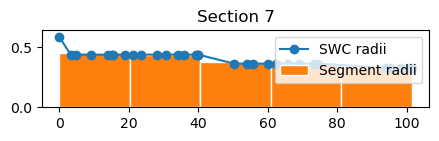

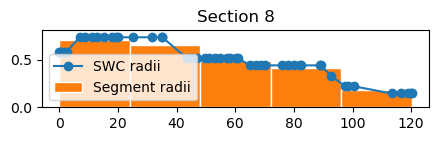

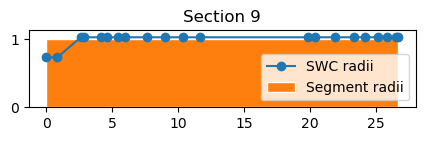

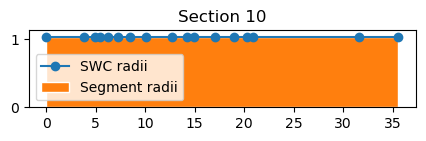

In [21]:
for sec in model.sec_tree.sections:
        fig, ax = plt.subplots(figsize=(5, 1))
        sec.plot_radii(ax)
        ax.set_title(f'Section {sec.idx}')
        if sec.idx >= 10:
            break

In [22]:
len(model.seg_tree)

186

# Add more mechanisms

In [23]:
model.add_archive('Park_test')

Replacing SUFFIX Na with SUFFIX Na
Saved changes to data/mod/Park_test/Na.mod
Replacing SUFFIX Kv with SUFFIX Kv
Saved changes to data/mod/Park_test/Kv.mod
Loaded mechanisms from "data/mod/Park_test"
Saved content to data/collection/Park_test/Na.py
Module name: data.collection.Park_test.Na
data.collection.Park_test.Na
Mechanism Na added to model.
Saved content to data/collection/Park_test/Kv.py
Module name: data.collection.Park_test.Kv
data.collection.Park_test.Kv
Mechanism Kv added to model.


In [24]:
model.mechanisms

{'Leak': Mechanism(Leak) with parameters: {'gbar_Leak': 0.0001},
 'Na': Mechanism(Na) with parameters: {'gbar_Na': 0.0, 'Rma_Na': 0.182, 'Rmb_Na': 0.14, 'v12m_Na': -30, 'qm_Na': 9.8, 'Rhb_Na': 0.0091, 'Rha_Na': 0.024, 'v12ha_Na': -45, 'v12hb_Na': -70, 'qh_Na': 5, 'v12hinf_Na': -60, 'qhinf_Na': 6.2},
 'Kv': Mechanism(Kv) with parameters: {'gbar_Kv': 0.0, 'v12_Kv': 25, 'q_Kv': 9}}

In [25]:
model.parameters_to_groups

{'cm': ['all'], 'Ra': ['all']}

In [26]:
model.groups_to_parameters

{'all': ['cm', 'Ra']}

# Add more groups and parameters

In [27]:
soma = model.sec_tree.soma
model.add_group('somatic', [soma])

In [28]:
model.mechanisms

{'Leak': Mechanism(Leak) with parameters: {'gbar_Leak': 0.0001},
 'Na': Mechanism(Na) with parameters: {'gbar_Na': 0.0, 'Rma_Na': 0.182, 'Rmb_Na': 0.14, 'v12m_Na': -30, 'qm_Na': 9.8, 'Rhb_Na': 0.0091, 'Rha_Na': 0.024, 'v12ha_Na': -45, 'v12hb_Na': -70, 'qh_Na': 5, 'v12hinf_Na': -60, 'qhinf_Na': 6.2},
 'Kv': Mechanism(Kv) with parameters: {'gbar_Kv': 0.0, 'v12_Kv': 25, 'q_Kv': 9}}

In [29]:
model.insert_mechs(mech_names=['Na', 'Kv'], 
                   group_names=['somatic', 'all'])

In [30]:
model.insert_mechs(mech_names=['Leak'], 
                   group_names=['all'])

In [31]:
func = dd.DistributionFunction('uniform', value=0.0001)
model.groups['all'].add_parameter('gbar_Leak', func)

In [32]:
func = dd.DistributionFunction('uniform', value=0.05)
model.groups['somatic'].add_parameter('gbar_Na', func)
func = dd.DistributionFunction('uniform', value=0.03)
model.groups['all'].add_parameter('gbar_Na', func)

In [33]:
func = dd.DistributionFunction('uniform', value=0.005)
model.groups['somatic'].add_parameter('gbar_Kv', func)
func = dd.DistributionFunction('uniform', value=0.003)
model.groups['all'].add_parameter('gbar_Kv', func)

In [34]:
func = dd.DistributionFunction('uniform', value=2)
model.groups['somatic'].add_parameter('cm', func)

In [35]:
for group in model.groups.values():
    for param_name in group.parameters:
        group.distribute(param_name)

  Elapsed time: 0.04 seconds
  Elapsed time: 0.01 seconds
  Elapsed time: 0.04 seconds
  Elapsed time: 0.03 seconds
  Elapsed time: 0.03 seconds
  Elapsed time: 0.0 seconds
  Elapsed time: 0.0 seconds
  Elapsed time: 0.0 seconds


In [36]:
model.groups

OrderedDict([('all',
              Group(all) with 52 nodes
              Parameters: ['cm', 'Ra', 'gbar_Leak', 'gbar_Na', 'gbar_Kv']),
             ('somatic',
              Group(somatic) with 1 nodes
              Parameters: ['gbar_Na', 'gbar_Kv', 'cm'])])

## Problem with diams

In [48]:
# Section diam in NEURON
sec._ref.diam

2.0599999427795415

In [49]:
# diam of each segment in NEURON
seg_diams = np.array([seg.diam for seg in sec._ref])
print(f'{seg_diams.size} segments with diam {seg_diams.mean()}')

1 segments with diam 2.0599999427795415


In [50]:
# diam of each pt3d in neuron
pts3d_diams = np.array([sec._ref.diam3d(i) for i in range(sec._ref.n3d())])
print(f'{pts3d_diams.size} pt3d with diam {pts3d_diams.mean()}')

17 pt3d with diam 2.059999942779541


In [51]:
# diam of each pt3d in custom section
swc_diams = np.array([pt.r*2 for pt in sec.pts3d])
print(f'{swc_diams.size} pt3d with diam {swc_diams.mean()}')

17 pt3d with diam 2.06


In [ ]:
# from core.utils import calculate_lambda_f
# from neuron import h
# h.load_file('stdrun.hoc')
# f = 100
# for sec in model.sec_tree.sections:
#     neuron_sec = sec._ref
#     # diam = neuron_sec.diam
#     diam = np.array([seg.diam for seg in sec._ref]).mean()
#     lambda_f = calculate_lambda_f(diam, neuron_sec.Ra, neuron_sec.cm)
#     lambda_f_neuron = h.lambda_f(f, sec=neuron_sec)
#     nseg = int((neuron_sec.L / (0.1 * lambda_f) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f:.5f} um')
#     nseg_neuron = int((neuron_sec.L / (0.1 * lambda_f_neuron) + 0.9) / 2) * 2 + 1
#     # print(f'Section {sec.idx} has {nseg} segments with lambda_f = {lambda_f_neuron:.5f} um')
#     # print(f'Neuron lambda_f = {lambda_f_neuron:.5f} um, calculated lambda_f = {lambda_f:.5f} um')
#     print(f'Neuron nseg = {nseg_neuron}, calculated nseg = {nseg}')

# Problem with nseg

Text(0.5, 1.0, 'Correspondence between nseg and length')

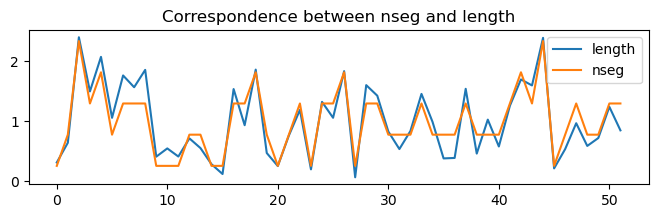

In [55]:
fig, ax = plt.subplots(figsize=(8, 2))
sec_ids = np.array([sec.idx for sec in model.sec_tree.sections])
sec_nseg = np.array([sec._ref.nseg for sec in model.sec_tree.sections])
sec_diams = np.array([np.array([seg.diam for seg in sec._ref]).mean() for sec in model.sec_tree.sections])
# sec_cm = np.array([sec._ref.cm for sec in model.sec_tree.sections])
# sec_Ra = np.array([sec._ref.Ra for sec in model.sec_tree.sections])
sec_lenghts = np.array([sec._ref.L for sec in model.sec_tree.sections])
# draw a vertical line between nseg and length datapoints for each section

sec_nseg = sec_nseg / sec_nseg.mean()
sec_lenghts = sec_lenghts / sec_lenghts.mean()

ys = sec_nseg - sec_lenghts

# ax.vlines(sec_ids, sec_nseg, sec_lenghts, color='k', label='nseg')
ax.plot(sec_ids, sec_lenghts, '-', label='length')
ax.plot(sec_ids, sec_nseg, '-', label='nseg')
# ax.stem(sec_ids, ys, use_line_collection=True)
ax.legend()
ax.set_title('Correspondence between nseg and length')

In [56]:
for sec in model.sec_tree.sections:
    print(f'Section {sec.idx} has {sec._ref.nseg} segments')

Section 0 has 1 segments
Section 1 has 3 segments
Section 2 has 9 segments
Section 3 has 5 segments
Section 4 has 7 segments
Section 5 has 3 segments
Section 6 has 5 segments
Section 7 has 5 segments
Section 8 has 5 segments
Section 9 has 1 segments
Section 10 has 1 segments
Section 11 has 1 segments
Section 12 has 3 segments
Section 13 has 3 segments
Section 14 has 1 segments
Section 15 has 1 segments
Section 16 has 5 segments
Section 17 has 5 segments
Section 18 has 7 segments
Section 19 has 3 segments
Section 20 has 1 segments
Section 21 has 3 segments
Section 22 has 5 segments
Section 23 has 1 segments
Section 24 has 5 segments
Section 25 has 5 segments
Section 26 has 7 segments
Section 27 has 1 segments
Section 28 has 5 segments
Section 29 has 5 segments
Section 30 has 3 segments
Section 31 has 3 segments
Section 32 has 3 segments
Section 33 has 5 segments
Section 34 has 3 segments
Section 35 has 3 segments
Section 36 has 3 segments
Section 37 has 5 segments
Section 38 has 3 segme

# Mechanisms kinetics

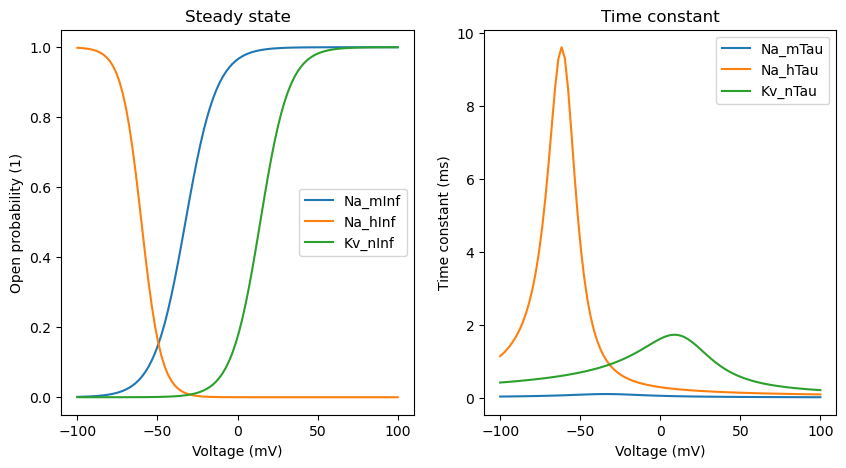

In [37]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
model.mechanisms['Na'].plot_kinetic_variables(ax)
model.mechanisms['Kv'].plot_kinetic_variables(ax)

# Simulate

In [ ]:
for seg in model.seg_tree:
    seg._ref.e_Leak = -79
    seg._ref.ena = 60
    seg._ref.ek = -80

In [46]:
model.simulator.v_init = -79
model.simulator.celsius = 37

In [39]:
seg = model.seg_tree[0]
model.simulator.add_recording(seg)

In [43]:
model.remove_all_iclamps()
model.add_iclamp(seg, amp=0.15, delay=100, dur=100)

IClamp added to segment •0


In [47]:
t, v, _ = model.simulator.run(duration=300)

(-100.0, 60.0)

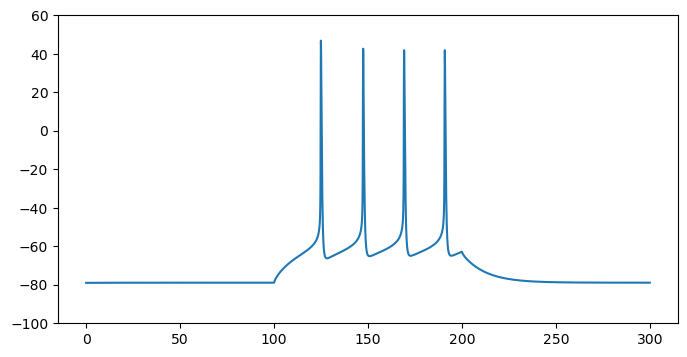

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(t[0], v[0])
ax.set_ylim(-100, 60)

# Synapses

In [ ]:
pop = dd.Population(name='all', sections=model.sec_tree._nodes, N=50, syn_type='Exp2Syn')

In [ ]:
pop.assign_sec_and_loc()

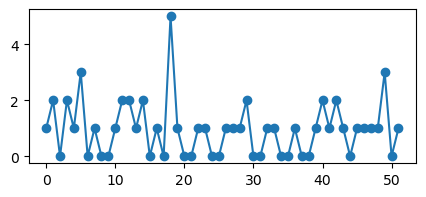

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2))
# histogram of synapse N per secton (pop.n_per_sec)
plt.plot([v for k,v in pop.n_per_sec.items()], 'o-');

In [ ]:
# pop.create_and_reference()

In [ ]:
print(json.dumps(pop.to_dict(), indent=4))

{
    "population": {
        "name": "all",
        "input_params": {
            "rate": 1,
            "noise": 1,
            "start": 100,
            "end": 200,
            "weight": 1,
            "delay": 0
        },
        "kinetic_params": {
            "gmax": 0.001,
            "tau_rise": 0.2,
            "tau_decay": 1.4,
            "e": 0,
            "gamma": 0.062,
            "mu": 0.28
        },
        "syn_type": "Exp2Syn",
        "synapses": [
            {
                "sec_idx": 0,
                "locs": [
                    0.63
                ]
            },
            {
                "sec_idx": 1,
                "locs": [
                    0.61,
                    0.25
                ]
            },
            {
                "sec_idx": 3,
                "locs": [
                    1.0,
                    0.22
                ]
            },
            {
                "sec_idx": 4,
                "locs": [
                   